## JSON TO DF

In [56]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [57]:
filenames = os.listdir()
dfs = list()
for file in filenames:
    if file.endswith('.json'):
        f = open(file)
        d = json.load(f)
        d = pd.json_normalize(d)
        df = pd.DataFrame(d)
        dfs.append(df)
        f.close()
init_df = pd.concat(dfs)
df = pd.concat(dfs)


## Data Cleaning 

In [58]:
df = df.drop(labels = ['lastMoveAt', 'createdAt', 'players.white.user.patron', 'players.black.user.patron', 'initialFen'], axis=1)

In [59]:
df = df.drop(labels = ['players.white.user.name', 'players.black.user.name', 'players.black.user.id', 'players.white.user.id'], axis = 1)

## Examining Data

In [60]:
df.shape

(10000, 23)

In [61]:
df.size

230000

In [62]:
df.columns

Index(['id', 'rated', 'variant', 'speed', 'perf', 'status', 'winner', 'moves',
       'players.white.user.title', 'players.white.rating',
       'players.white.ratingDiff', 'players.black.rating',
       'players.black.ratingDiff', 'clock.initial', 'clock.increment',
       'clock.totalTime', 'players.white.aiLevel', 'players.black.user.title',
       'players.black.aiLevel', 'players.white.provisional',
       'players.black.provisional', 'tournament', 'swiss'],
      dtype='object')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  object 
 1   rated                      10000 non-null  bool   
 2   variant                    10000 non-null  object 
 3   speed                      10000 non-null  object 
 4   perf                       10000 non-null  object 
 5   status                     10000 non-null  object 
 6   winner                     9240 non-null   object 
 7   moves                      10000 non-null  object 
 8   players.white.user.title   7785 non-null   object 
 9   players.white.rating       9934 non-null   float64
 10  players.white.ratingDiff   8896 non-null   float64
 11  players.black.rating       9820 non-null   float64
 12  players.black.ratingDiff   8896 non-null   float64
 13  clock.initial              9864 non-null   float

In [64]:
df.describe()

,players.white.rating,players.white.ratingDiff,players.black.rating,players.black.ratingDiff,clock.initial,clock.increment,clock.totalTime,players.white.aiLevel,players.black.aiLevel
count,9934.000000,8896.000000,9820.000000,8896.000000,9864.000000,9864.000000,9864.000000,66.000000,179.000000
mean,2791.980773,0.358588,2776.662016,0.032824,91.496350,0.233577,100.839416,1.469697,2.659218
std,356.291002,10.928364,381.935652,12.761779,151.702633,2.499596,228.075886,1.511186,1.645922
min,851.000000,-199.000000,664.000000,-121.000000,0.000000,0.000000,15.000000,1.000000,1.000000
25%,2651.000000,-3.000000,2610.000000,-4.000000,30.000000,0.000000,30.000000,1.000000,1.000000
50%,2874.000000,0.000000,2883.000000,0.000000,60.000000,0.000000,60.000000,1.000000,3.000000
75%,3025.000000,4.000000,3026.000000,3.000000,60.000000,0.000000,100.000000,1.000000,3.000000
max,3377.000000,700.000000,3379.000000,707.000000,10800.000000,180.000000,18000.000000,8.000000,8.000000


## Histogram Plotting

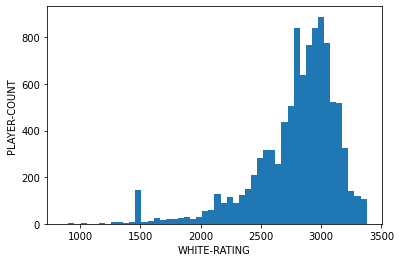

In [81]:
x = df['players.white.rating'].replace(np.nan, 0)
# # x.shape
plt.hist(x, 50)
plt.xlabel('WHITE-RATING')
plt.ylabel('PLAYER-COUNT')
plt.show()
# df.head()

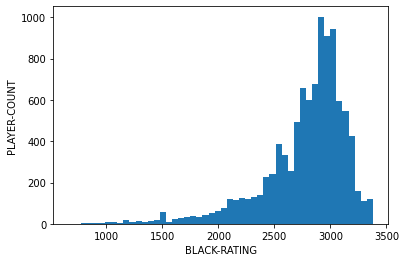

In [80]:
x = df['players.black.rating'].replace(np.nan, 0)
# x.shape
plt.hist(x, 50)
plt.xlabel('BLACK-RATING')
plt.ylabel('PLAYER-COUNT')
plt.show()

## Encoding Categorical Variables

In [67]:
df.columns

Index(['id', 'rated', 'variant', 'speed', 'perf', 'status', 'winner', 'moves',
       'players.white.user.title', 'players.white.rating',
       'players.white.ratingDiff', 'players.black.rating',
       'players.black.ratingDiff', 'clock.initial', 'clock.increment',
       'clock.totalTime', 'players.white.aiLevel', 'players.black.user.title',
       'players.black.aiLevel', 'players.white.provisional',
       'players.black.provisional', 'tournament', 'swiss'],
      dtype='object')

In [68]:
df['rated'].replace([True, False], [1, 0], inplace=True)
# df['players.black.user.title'] = df["players.black.user.title"].astype('int32')
df['players.white.user.title'].replace(np.nan, 'LM', inplace=True)
df['players.black.user.title'].replace(np.nan, 'LM', inplace=True)
avg_rating_white = np.mean(df['players.white.rating'])
avg_rating_black = np.mean(df['players.black.rating'])
df['players.white.rating'].replace(np.nan, avg_rating_white, inplace=True)
df['players.black.rating'].replace(np.nan, avg_rating_black, inplace=True)
cats = df['players.black.user.title'].unique()
cats_enc = [8, 4, 2, 1, 6, 7, 3, 5]
arr = [1.0,  3.0,  2.0,  5.0,  4.0,  8.0,  6.0]
df['players.black.user.title'].replace(cats, cats_enc, inplace=True)
df['players.white.user.title'].replace(cats, cats_enc, inplace=True)
df['players.white.aiLevel'].replace(np.nan, "Human", inplace=True)
df['players.black.aiLevel'].replace(np.nan, "Human", inplace=True)
df['players.white.aiLevel'].replace(arr, "Engine", inplace=True)
df['players.black.aiLevel'].replace(arr, "Engine", inplace=True)

# df.head()
# newarr = df['players.black.aiLevel'].unique()
df.head()
# newarr

,id,rated,variant,speed,perf,status,winner,moves,players.white.user.title,players.white.rating,...,clock.initial,clock.increment,clock.totalTime,players.white.aiLevel,players.black.user.title,players.black.aiLevel,players.white.provisional,players.black.provisional,tournament,swiss
0,xWXXUx9H,1,horde,bullet,horde,variantEnd,black,d5 e6 d4 h5 e5 exf5 gxf5 d6 e4 dxc5 bxc5 a5 d3...,4,2449.000000,...,60.0,0.0,60.0,Human,8,Human,NaN,NaN,NaN,NaN
1,fvEwyB01,0,standard,ultraBullet,ultraBullet,outoftime,white,e4 c6 e5 d5 f4 c5 Nf3 Nc6 Bb5 Bf5 O-O e6 Ng5 B...,8,2791.980773,...,15.0,0.0,15.0,Engine,4,Human,NaN,NaN,NaN,NaN
2,1Xibgkuy,0,standard,ultraBullet,ultraBullet,draw,NaN,d4 e5 Nc3 exd4 Qxd4 Nf6 Qd1 d5 e4 Nc6 exd5 Ne5...,4,2606.000000,...,15.0,0.0,15.0,Human,8,Engine,NaN,NaN,NaN,NaN
3,LfMQZxF4,0,standard,ultraBullet,ultraBullet,outoftime,white,e4 c6 Bc4 d5 exd5 cxd5 Bb3 Nf6 d4 g6 Nf3 Bg7 O...,8,2791.980773,...,15.0,0.0,15.0,Engine,4,Human,NaN,NaN,NaN,NaN
4,uLocZbyq,0,standard,ultraBullet,ultraBullet,outoftime,black,d4 d5 Nc3 e6 f3 Nc6 e4 f5 exf5 exf5 Bb5 Kf7 Bx...,4,2606.000000,...,15.0,0.0,15.0,Human,8,Engine,NaN,NaN,NaN,NaN


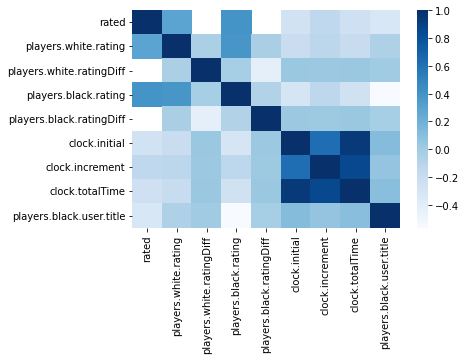

In [69]:
# dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
dataplot = sb.heatmap(df.corr(), cmap='Blues')
plt.show()

In [70]:
df.columns

Index(['id', 'rated', 'variant', 'speed', 'perf', 'status', 'winner', 'moves',
       'players.white.user.title', 'players.white.rating',
       'players.white.ratingDiff', 'players.black.rating',
       'players.black.ratingDiff', 'clock.initial', 'clock.increment',
       'clock.totalTime', 'players.white.aiLevel', 'players.black.user.title',
       'players.black.aiLevel', 'players.white.provisional',
       'players.black.provisional', 'tournament', 'swiss'],
      dtype='object')

## Charts For Variants

In [90]:
data_str = df['variant'].tolist()
lst = df['variant'].unique()
data = []
for i in lst:
    data.append(data_str.count(i))
print(data)

[26, 8973, 548, 143, 68, 54, 168, 12, 8]


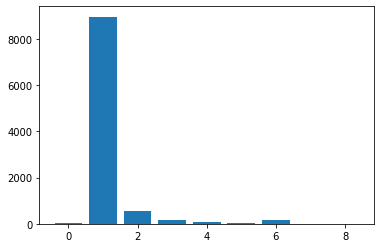

In [92]:
plt.bar(range(len(data)), data)
plt.show()